In [2]:
from pyvm.classes.videoclass import Videos
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyvm.globals import BASEDIR

import pickle

In [24]:
def displacement(x,y):
    x_diff = x.diff()
    y_diff = y.diff()  
    return np.sqrt(x_diff**2 + y_diff**2)

In [116]:
expt = '220317_chunkbyshape4'
condition = 'behavior'

data_dir = f"{BASEDIR}/{expt}/{condition}/extracted_dlc_data"

expt = '220317_chunkbyshape4'
condition = 'behavior'

V = Videos()
V.load_data_wrapper(expt, condition)

V.import_dlc_data()
sdir = f"{V.Params['load_params']['basedir']}/extracted_dlc_data"
cams = list(V.Params['load_params']['camera_names'].values())

list_trials = V.inds_trials()
pkl_list = []
for file in os.listdir(data_dir):
    if file.endswith(".pkl"):
        pkl_list.append(f"{data_dir}/{file}")

[4, 20]
<class 'list'>
None
<class 'NoneType'>
None
<class 'NoneType'>
SEARCHIG:  /data3/hand_track/Pancho/220317_chunkbyshape4/behavior
Searching using this string:
/data3/hand_track/Pancho/220317_chunkbyshape4/behavior/Camera1/*vid*.mp4
Found this many paths:
0
Searching using this string:
/data3/hand_track/Pancho/220317_chunkbyshape4/behavior/Camera1/*vid*.avi
Found this many paths:
0
Searching using this string:
/data3/hand_track/Pancho/220317_chunkbyshape4/behavior/flea/*vid*.mp4
Found this many paths:
623
---
/data3/hand_track/Pancho/220317_chunkbyshape4/behavior/flea/flea-vid-t10-downsampled.mp4
---
/data3/hand_track/Pancho/220317_chunkbyshape4/behavior/flea/flea-vid-t10-downsampledDLC_resnet50_combined-flea_fly1_bfs2_bfs1Jul3shuffle1_10000_labeled.mp4
---
/data3/hand_track/Pancho/220317_chunkbyshape4/behavior/flea/flea-vid-t11-downsampled.mp4
---
/data3/hand_track/Pancho/220317_chunkbyshape4/behavior/flea/flea-vid-t11-downsampledDLC_resnet50_combined-flea_fly1_bfs2_bfs1Jul3shuf

In [119]:
#After running loop this will contain one df for each trial, containing
#the (x,y) coord, displacement, and likelhiood for each camera
df_list = []
for cam in cams:
    columns.append(f"{cam}_x")
    columns.append(f"{cam}_y")
    columns.append(f"{cam}_disp")
    columns.append(f"{cam}_like")
    
for trial in list_trials:
    df = pd.DataFrame()
    for cam in cams:
        prefix = f"camera_{cam}_-trial_{trial}"
        this_file = [file for file in pkl_list if prefix in file]
        assert len(this_file) == 1, "Extra copy or no copy of pkl file for this cam/trial? Or new naming convention (uh oh)"
        with open(this_file[0], 'rb') as f:
            data = pd.read_pickle(f)
            data = pd.DataFrame(data)
            data = data.droplevel([0,1],axis=1)
            data["disp"] = displacement(data['x'],data['y']).fillna(0)
            n = data.shape[1] // 2
            d = {
                f"{cam}_x": data['x'],
                f"{cam}_y": data['y'],
                f"{cam}_disp": data["disp"],
                f"{cam}_like": data["likelihood"]
            }
            add_df = pd.DataFrame(data=d)
            df = pd.concat([df,add_df], axis=1)
    df_list.append(df)


In [118]:
print(d)

{'flea_x': ['x'], 'flea_y': 0      389.262050
1      389.459114
2      389.539039
3      389.539039
4      389.459114
          ...    
454     95.737567
455     95.737567
456     95.739402
457     95.737567
458     95.736274
Name: y, Length: 459, dtype: float64, 'flea_disp': 0      0.000000
1      0.651360
2      0.079925
3      0.000000
4      0.080259
         ...   
454    0.001859
455    0.067609
456    0.001835
457    0.003172
458    0.059083
Name: disp, Length: 459, dtype: float64, 'flea_like': 0      0.985919
1      0.980813
2      0.981840
3      0.977521
4      0.980288
         ...   
454    0.076668
455    0.081058
456    0.077932
457    0.080901
458    0.076135
Name: likelihood, Length: 459, dtype: float64}


/tmp/ipykernel_25170/2145479422.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax_xy.scatter(df[f"{cam}_x"], df[f"{cam}_y"], c=colors, cmap='viridis', label=cam)


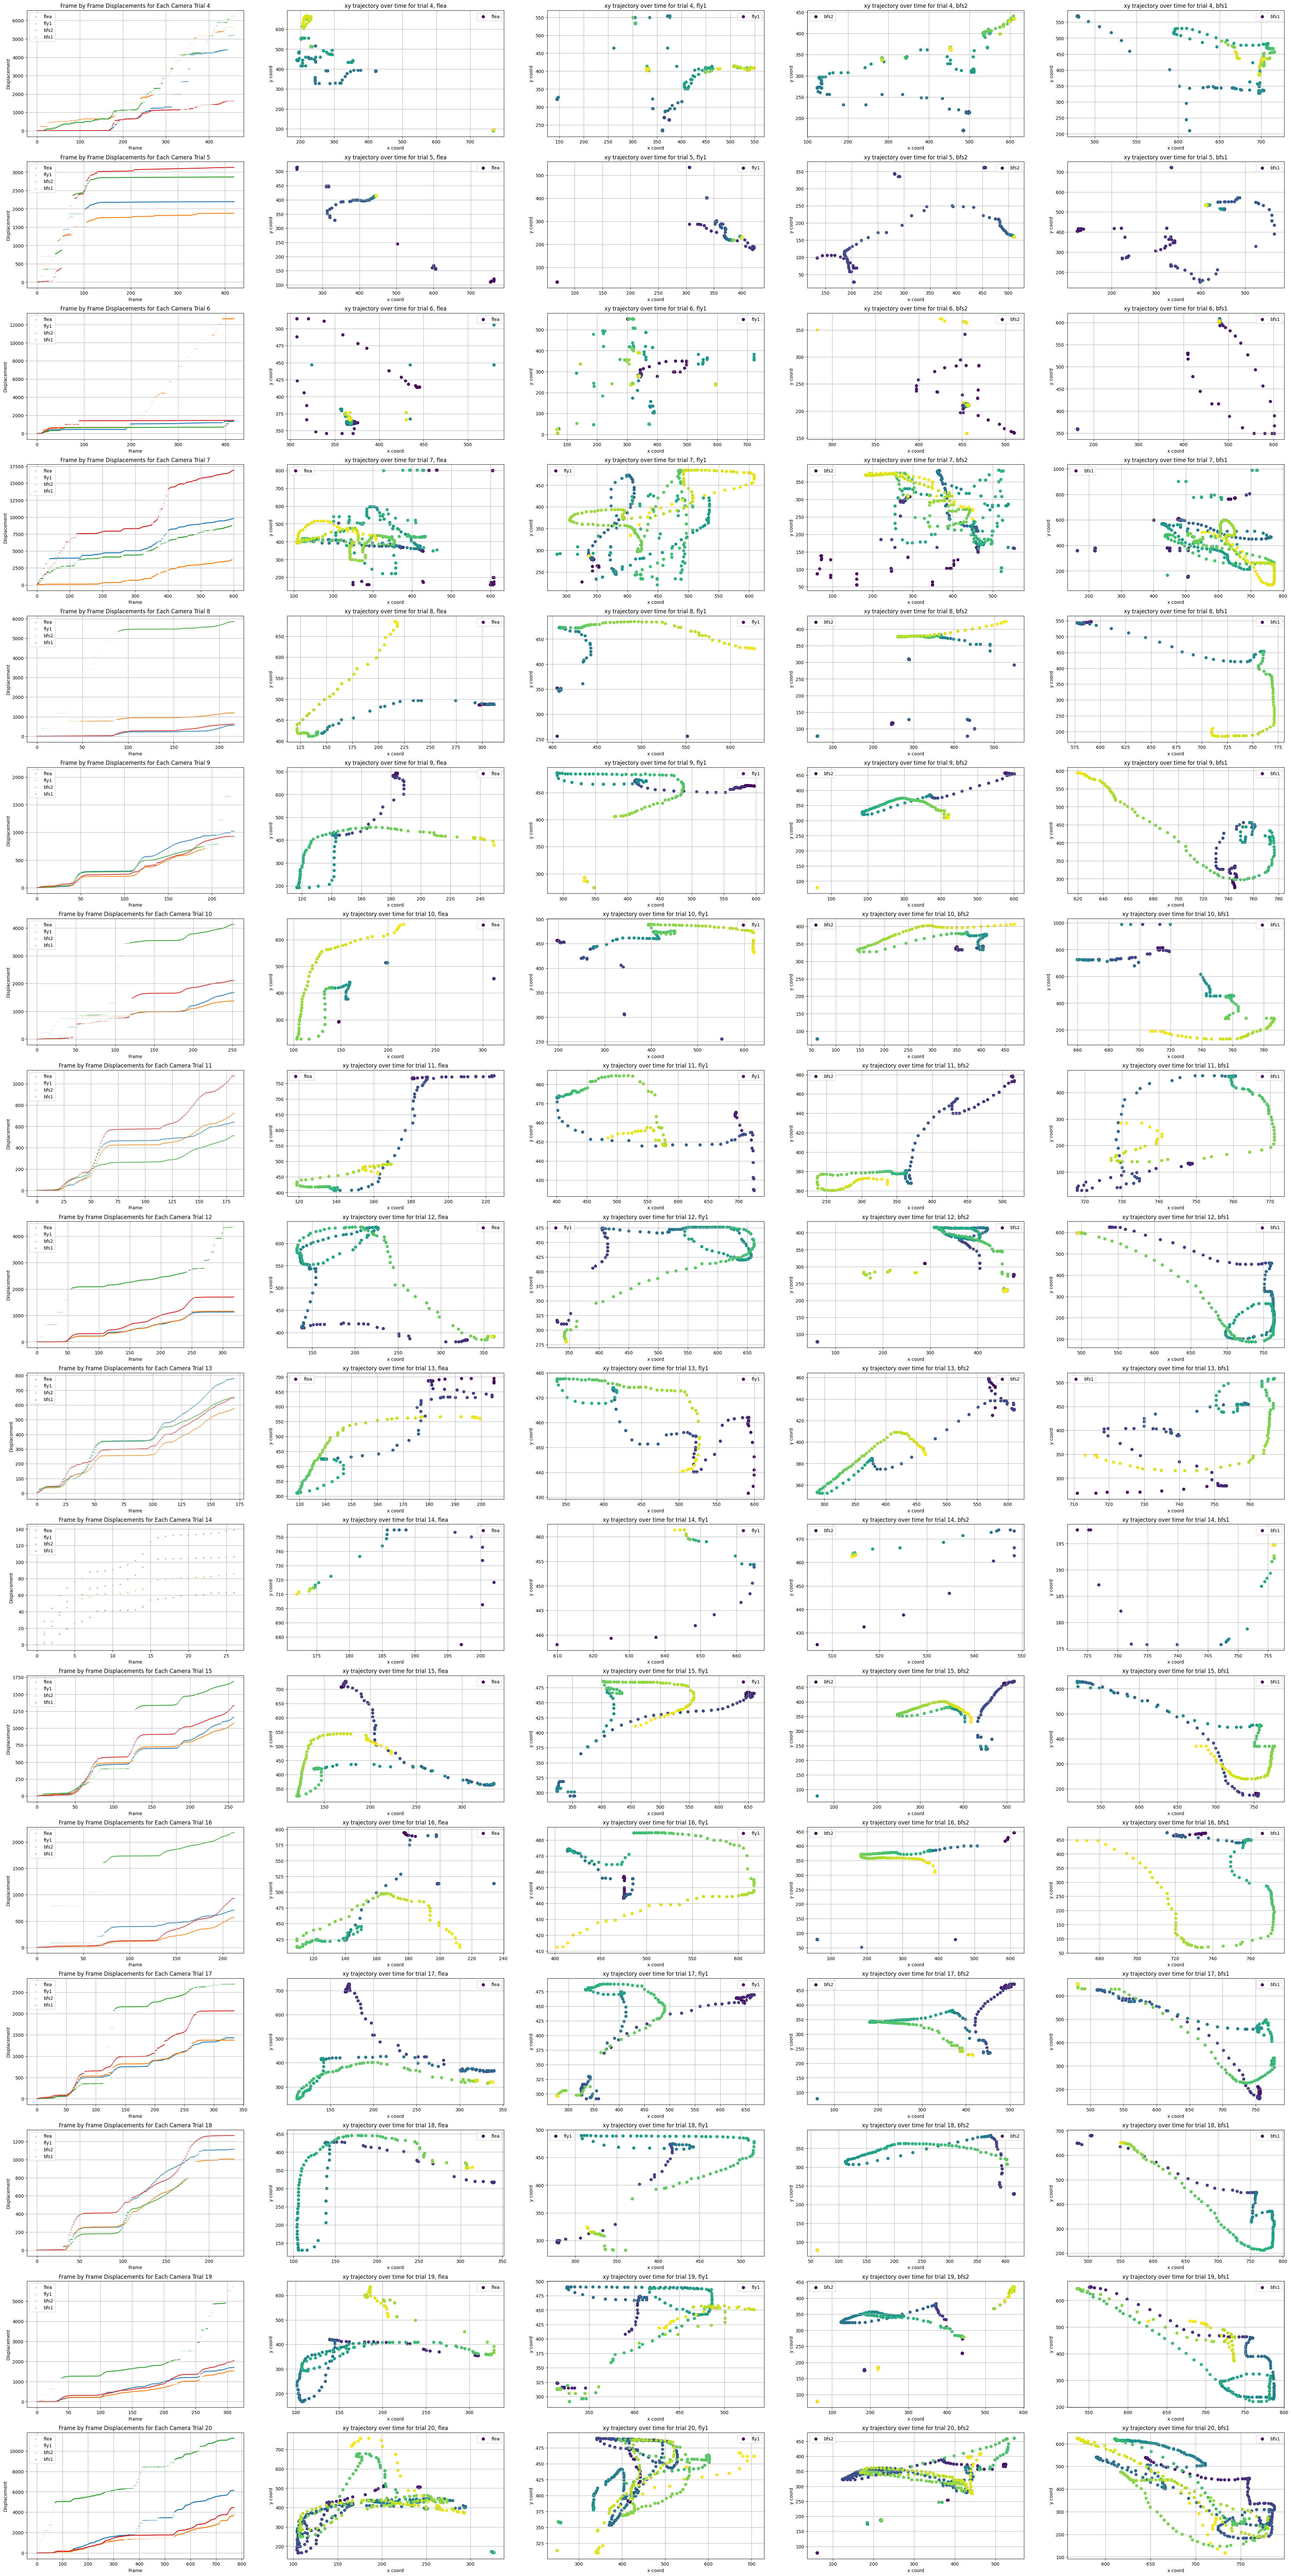

In [130]:
n = len(df_list)
m = len(cams) + 1
fig, axes = plt.subplots(nrows=n, ncols = m, figsize=(10*m,6*n))
if n == 1:
    axes = [axes]
ax_ind = 0
for df,t in zip(df_list,list_trials):
    ax_disp = axes[ax_ind][0]
    for cam in cams:
        ax_disp.scatter(x=df.index, y=df[f"{cam}_disp"].cumsum().fillna(0),s=df[f"{cam}_like"], label=cam)
    ax_disp.set_xlabel('Frame')
    ax_disp.set_ylabel('Displacement')
    ax_disp.set_title(f'Frame by Frame Displacements for Each Camera Trial {t}')
    ax_disp.legend()
    ax_disp.grid(True)
    axes[ax_ind][0] = ax_disp
    rng = range(1,len(cams)+2)
    for i,cam in zip(rng,cams):
        ax_xy = axes[ax_ind][i]
        n_points = len(df)
        indices=np.arange(n_points)
        colors = plt.cm.viridis(indices/max(indices))
        ax_xy.scatter(df[f"{cam}_x"], df[f"{cam}_y"], c=colors, cmap='viridis', label=cam)
        ax_xy.set_xlabel('x coord')
        ax_xy.set_ylabel('y coord')
        ax_xy.set_title(f'xy trajectory over time for trial {t}, {cam}')
        ax_xy.legend()
        ax_xy.grid(True)
        axes[ax_ind][i] = ax_xy
    ax_ind = ax_ind + 1

In [82]:
df_list[6].head()

IndexError: list index out of range